# A step-by-step machine learning regression project using Linear Regression and Random Forest algorithms

The `Seoul Bike Sharing Demand` dataset is provided by the `UCI Machine Learning Repository`.
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand 

## Problem Definition

The goal of this project is to build a linear regression model to predict bike rental demand in Seoul using historical data from the Seoul Bike Sharing system. The model will use various factors such as temperature, humidity, wind speed, rainfall, holidays, and season to predict the number of bikes rented each day. The performance will be evaluated using metrics like Mean Squared Error (MSE) and R-squared (R²).

Goals: 

*    Predict bike rental demand using a linear regression model.
*    Analyze key factors (e.g., weather, season) influencing bike rentals.
*    Identify patterns in bike-sharing demand over time.
*    Ensure the model generalizes well to new data.
*    Understand the impact of environmental and seasonal factors on bike demand.

Target Variable: The target variable or outcome is the `Rented Bike Count`.

## Import the libraries

In [320]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

## Load the Data

In [321]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


## Data Exploration

Take a Quick Look at the Data Structure

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Let's take a look at the numerical attributes:

In [323]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


let's take a quick look at all the categorical attributes

In [324]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [325]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [326]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

#### Visualizing the important characteristics of a dataset

In [327]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

We will create a `scatterplot matrix` that allows us to visualize the `pair-wise correlations` between the different features in this dataset in one place

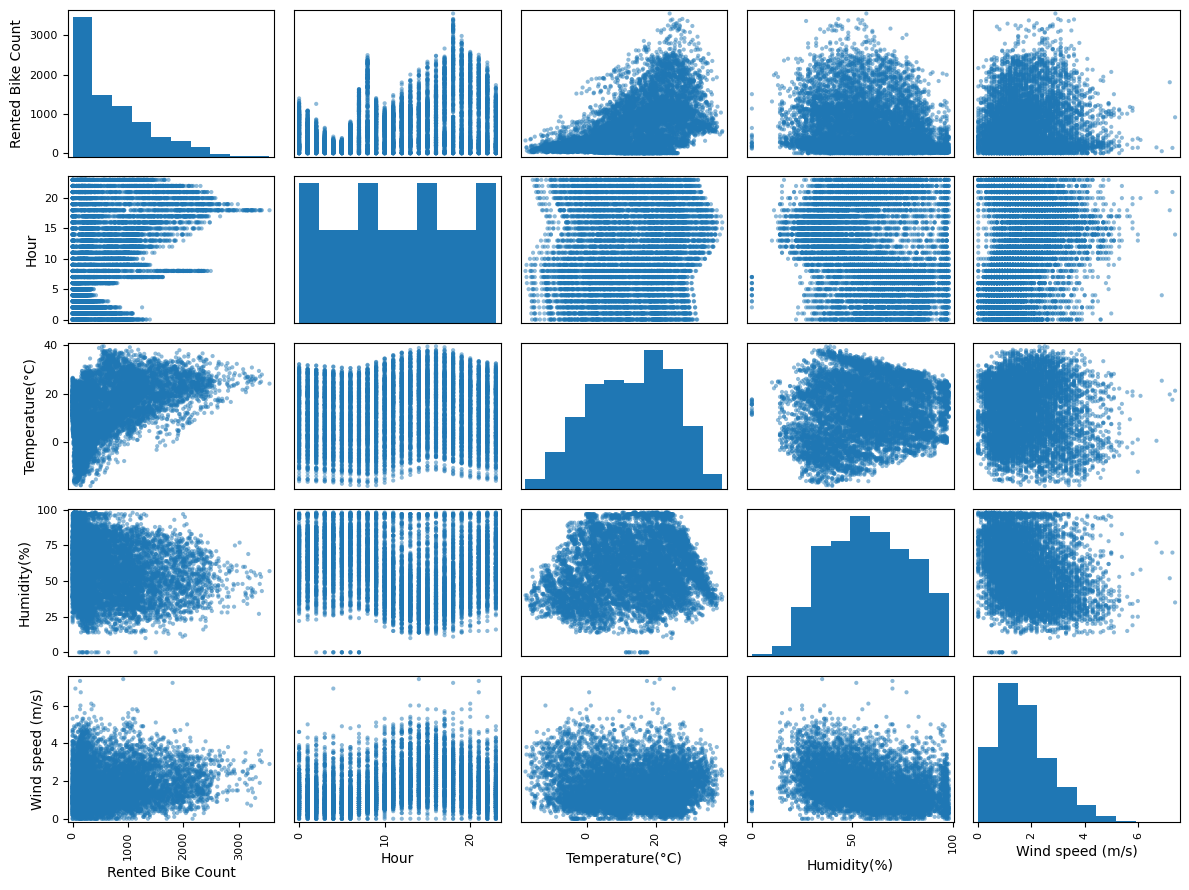

In [328]:
from pandas.plotting import scatter_matrix


columns1 = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)']

selected_df1 = df[columns1]

scatter_matrix(selected_df1[columns1], figsize=(12, 9))
plt.tight_layout()
plt.show()

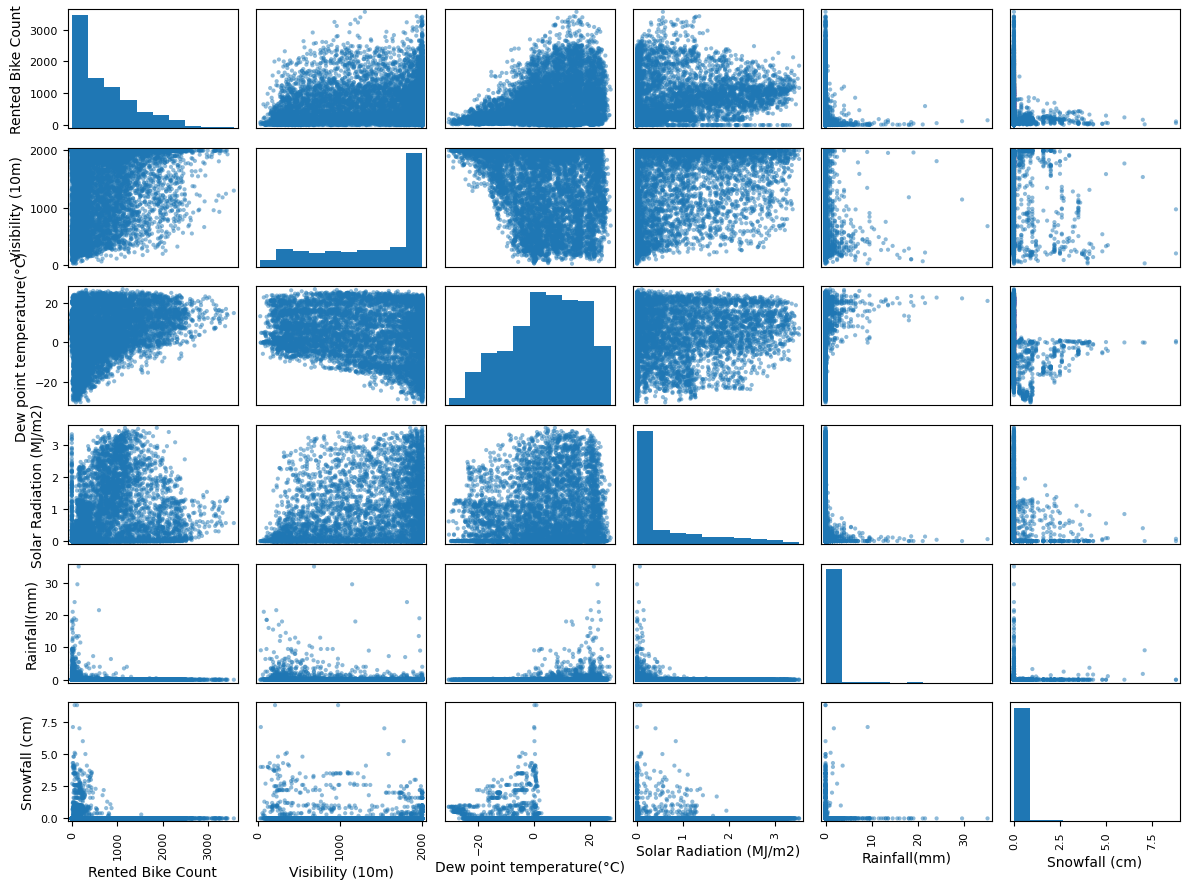

In [329]:
columns2 = ['Rented Bike Count', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

selected_df2 = df[columns2]

scatter_matrix(selected_df2[columns2], figsize=(12, 9))
plt.tight_layout()
plt.show()

Looking at relationships using a correlation matrix

In [330]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix['Rented Bike Count'].sort_values(ascending=False))

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


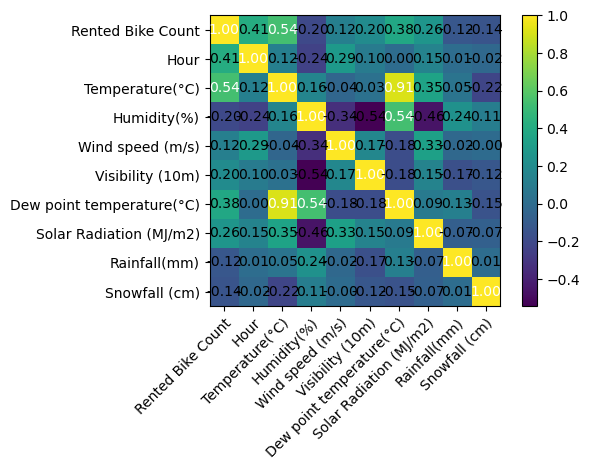

In [331]:
import numpy as np
from mlxtend.plotting import heatmap

df_exempted = df[[col for col in df.columns if col not in ['Date', 
                                                           'Seasons', 
                                                           'Holiday', 
                                                           'Functioning Day']]]

cm = np.corrcoef(df_exempted.values.T)
hm = heatmap(cm, row_names=df_exempted.columns, column_names=df_exempted.columns)

plt.tight_layout()
plt.show()

Looking at the above correlation matrix, we can see that `Rented Bike Count` shows the largest correlation with the `Temperature(°C)` variable `(0.54)`, which seems to be a good choice for an exploratory variable. 

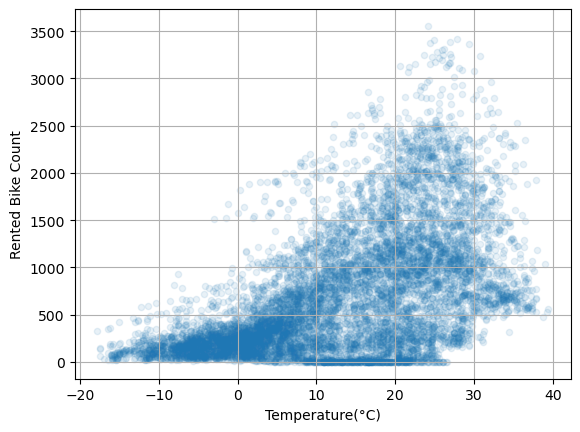

In [332]:
df_exempted.plot(kind="scatter", x="Temperature(°C)", y="Rented Bike Count",
             alpha=0.1, grid=True)
plt.show()

## Data Cleaning and Preparation

Create a copy of the data to preserve the original data

In [333]:
df_copy = df.copy()
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


Find duplicate rows across all columns

In [334]:
df[df.duplicated()].any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

Convert the Date Column from object to date_time format

In [335]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], dayfirst=True)
df_copy.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


## Feature Engineering

Extract new features from the Date column

In [336]:
df_copy['Day_of_Week'] = df_copy['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_copy['Month'] = df_copy['Date'].dt.month  # Extract month
df_copy['Year'] = df_copy['Date'].dt.year  # Extract year
df_copy['Day'] = df_copy['Date'].dt.day  # Extract day
df_copy['Is_Weekend'] = df_copy['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

df_copy.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day_of_Week,Month,Year,Day,Is_Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12,2017,1,0


In [338]:
df_copy['Year'].value_counts()

Year
2018    8016
2017     744
Name: count, dtype: int64

Since the `years` in the dataset doesn't spans multiple years, we can remove the `Year and Date columns`. Also the `Day column`, which is less relevant than the `Day_of_Week`.

In [339]:
df_copy.drop(columns=['Date', 'Year', 'Day'], inplace=True)

Convert the categorical values in `Holiday` and `Day_of_Week` columns to numerical values.

In [340]:
df_copy['Holiday'] = df_copy['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
df_copy['Functioning Day'] = df_copy['Functioning Day'].map({'Yes': 1, 'No': 0})

df_copy.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day_of_Week,Month,Is_Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,4,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,4,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,4,12,0


In [341]:
df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day_of_Week', 'Month', 'Is_Weekend'],
      dtype='object')

In [342]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Day_of_Week                8760 non-null   int32

#### Transformation Pipelines

In [346]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

# Create a pipeline for categorical attributes
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

num_attribs = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
               'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 
               'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day_of_Week', 
               'Month', 'Is_Weekend']
cat_attribs = ['Seasons']

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

## Split the dataset

Split the data into `training` and `testing` sets.

In [347]:
from sklearn.model_selection import train_test_split

X = df_copy[[col for col in df_copy.columns if col != 'Rented Bike Count']]
y = df_copy['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                     random_state=0)  # You do not need stratify=y 
                                                                      # for regression

In [348]:
X_train_std = preprocess_pipeline.fit_transform(X_train)
X_train_std

array([[ 0.07561397,  0.93803785,  1.08092632, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.22019298,  2.08972768, -0.98397665, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21354405,  0.38722967, -1.13146972, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.06896504,  1.05487595, -0.04985388, ...,  0.        ,
         1.        ,  0.        ],
       [-1.65933414, -0.38056355,  0.04847484, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.23224605, -0.48071049,  1.22841939, ...,  1.        ,
         0.        ,  0.        ]])

Let's use Pandas Dataframe for a clearer view of our transformed `X_train_std` above.

In [349]:
def get_feature_names(data):
    df_prepared = pd.DataFrame(
        data,
        columns=preprocess_pipeline.get_feature_names_out(),
        index=X_train.index)
    return df_prepared

df_prepared = get_feature_names(X_train_std)
df_prepared.head(5)

,num__Hour,num__Temperature(°C),num__Humidity(%),num__Wind speed (m/s),num__Visibility (10m),num__Dew point temperature(°C),num__Solar Radiation (MJ/m2),num__Rainfall(mm),num__Snowfall (cm),num__Holiday,num__Functioning Day,num__Day_of_Week,num__Month,num__Is_Weekend,cat__Seasons_0.0,cat__Seasons_1.0,cat__Seasons_2.0,cat__Seasons_3.0
5316,0.075614,0.938038,1.080926,-0.886448,0.919502,1.254397,0.167554,-0.125899,-0.173321,-0.22521,0.182666,-0.991900,0.137942,-0.625638,0.0,0.0,1.0,0.0
5845,0.220193,2.089728,-0.983977,0.552278,0.702462,1.307901,2.833708,-0.125899,-0.173321,-0.22521,0.182666,-0.491420,0.427719,-0.625638,0.0,0.0,1.0,0.0
3586,-0.213544,0.387230,-1.131470,0.072703,0.212476,-0.167266,1.929733,-0.125899,-0.173321,-0.22521,0.182666,1.510499,-0.731389,1.598369,0.0,1.0,0.0,0.0
3054,-0.791860,-0.931372,-0.000690,1.991005,-0.413983,-0.732874,-0.656322,-0.125899,-0.173321,-0.22521,0.182666,1.010019,-0.731389,1.598369,0.0,1.0,0.0,0.0
6805,0.220193,1.188405,-0.983977,-0.023212,0.919502,0.574139,2.273015,-0.125899,-0.173321,-0.22521,0.182666,-1.492380,0.717496,-0.625638,1.0,0.0,0.0,0.0


Let's get the labels

In [350]:
y_train

5316    1035
5845     533
3586     787
3054     108
6805    1057
        ... 
4373     306
7891    1968
4859    1066
3264     401
2732     513
Name: Rented Bike Count, Length: 6132, dtype: int64

## Model Training

Lets train Linear Regression Model

In [351]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

y = y_train.values.ravel() # convert to 1D numpy array

lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
lin_reg.fit(X_train, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfall(mm)',
                                                   'Snowfall (cm)', 'Holiday',
                                                   'Functioning Day',
                                                   'Day_of_Week', 'Month',
                                                   'Is_Weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Seasons'])])),
                ('linearregression', LinearRegression())])

## Evaluating on the Training Set

Let's make prediction on a few training instances

In [352]:
y_train_predict = lin_reg.predict(X_train)
y_train_predict[:5].round(-2)  # -2 = rounded to the nearest hundred

array([ 900., 1500.,  900.,  400., 1300.])

Compare against the actual values

In [353]:
y_train.iloc[:5].values

array([1035,  533,  787,  108, 1057], dtype=int64)

Compute the error ratios

In [354]:
error_ratios = y_train_predict[:5].round(-2) / y_train.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-13.0%, 181.4%, 14.4%, 270.4%, 23.0%


Calculate the Mean_Squared_Error

In [355]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_predict)
print(f'MSE train: {mse_train:.2f}')

MSE train: 186179.08


Calculate Mean_Absolute_Error

In [356]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_predict)
print(f'MAE train: {mae_train:.2f}')

MAE train: 323.05


Calculate r2

In [357]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_predict)
print(f'R^2 train: {r2_train:.2f}')

R^2 train: 0.56


#### Better Evaluation Using Cross-Validation

In [358]:
from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, X_train, y,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_reg_rmses).describe()

count     10.000000
mean     433.023110
std       15.900948
min      412.737853
25%      419.913520
50%      435.268085
75%      445.190773
max      453.526294
dtype: float64

#### Dealing with nonlinear relationships using Random Forests

The model is performing poorly on the training data set, and we can also see from correlations that there are not many `Predictors correlation with the Target`. We will try using `Random Forest Regressor`.

In [359]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

forest_reg = make_pipeline(preprocess_pipeline,
                           RandomForestRegressor(random_state=42))
forest_reg.fit(X_train, y_train)

forest_reg_predictions = forest_reg.predict(X_train)

In [360]:
# Make prediction on a few training instances
print(forest_reg_predictions[:10].round(-2))

# Compare against the actual values
print(y_train.iloc[:10].values)

# Compute the error ratios
error_ratios = forest_reg_predictions[:10].round(-2) / y_train.iloc[:10].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

[ 900.  500.  800.  100. 1100.  500. 1900.    0. 1000.  700.]
[1035  533  787  108 1057  422 1806   16 1165  733]
-13.0%, -6.2%, 1.7%, -7.4%, 4.1%, 18.5%, 5.2%, -100.0%, -14.2%, -4.5%


Compute the `mean_squared_error`, `mean_absolute_error` and the `r2` for Random Forest

In [361]:
mse_train = mean_squared_error(y_train, forest_reg_predictions)
print(f'MSE train: {mse_train:.2f}')

mae_train = mean_absolute_error(y_train, forest_reg_predictions)
print(f'MAE train: {mae_train:.2f}')

r2_train = r2_score(y_train, forest_reg_predictions)
print(f'R^2 train: {r2_train:.2f}')

MSE train: 4120.93
MAE train: 36.90
R^2 train: 0.99


Random Forest Cross-Validation

In [362]:
forest_reg_rmses = -cross_val_score(forest_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
                              
pd.Series(forest_reg_rmses).describe()

count     10.000000
mean     173.596979
std       10.731388
min      159.100386
25%      166.684767
50%      174.131938
75%      177.369557
max      190.350028
dtype: float64

## Model Testing

Make Predictions on the test data

In [363]:
forest_test_predictions = forest_reg.predict(X_test)

mse_test = mean_squared_error(y_test, forest_test_predictions)
print(f'MSE test: {mse_test:.2f}')

mae_test = mean_absolute_error(y_test, forest_test_predictions)
print(f'MAE test: {mae_test:.2f}')

r2_test = r2_score(y_test, forest_test_predictions)
print(f'R^2 test: {r2_test:.2f}')


MSE test: 29525.89
MAE test: 99.97
R^2 test: 0.93


Cross-Validation after predicting on the Test sets

In [364]:
forest_reg_rmses = -cross_val_score(forest_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
print(f'Cross-validation RMSE: {forest_reg_rmses.mean():.2f}')

Cross-validation RMSE: 173.60


## Model Improvement

#### Check for `Overfitting/Underfitting` using `Learning Curves`

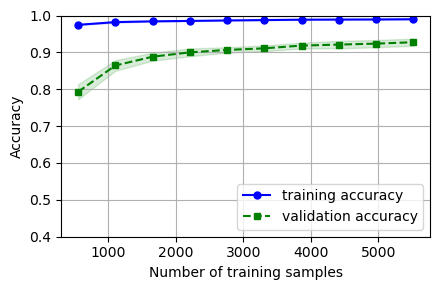

In [365]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def model_learning_curve(model, X, y):
    train_size, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=10,
        n_jobs=1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(4.5, 3)) 

    plt.plot(train_size, train_mean, 
            color='blue', marker='o', 
            markersize=5, 
            label='training accuracy')

    plt.fill_between(train_size,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='blue')

    plt.plot(train_size, test_mean,
            color='green', linestyle='--',
            marker='s', markersize=5,
            label='validation accuracy')

    plt.fill_between(train_size,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.0])
    plt.tight_layout()
    plt.show()

model_learning_curve(forest_reg, X_train, y_train)    


#### Lets look at feature importance to see if we can add/remove features `(Feature Engineering)` 

In [366]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train_std, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i in range(len(importances)):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.6f}")

Feature ranking:
Feature 1: 0.306351
Feature 0: 0.286104
Feature 6: 0.083525
Feature 10: 0.081721
Feature 2: 0.067268
Feature 7: 0.043354
Feature 5: 0.025594
Feature 11: 0.022033
Feature 12: 0.015478
Feature 13: 0.014937
Feature 17: 0.013861
Feature 14: 0.012245
Feature 3: 0.009409
Feature 4: 0.009304
Feature 9: 0.004553
Feature 15: 0.002336
Feature 16: 0.001322
Feature 8: 0.000605


Let's check the names and indexes of the features in our dataframe

In [367]:


df_prepared = get_feature_names(X_train_std)
df_prepared.columns

Index(['num__Hour', 'num__Temperature(°C)', 'num__Humidity(%)',
       'num__Wind speed (m/s)', 'num__Visibility (10m)',
       'num__Dew point temperature(°C)', 'num__Solar Radiation (MJ/m2)',
       'num__Rainfall(mm)', 'num__Snowfall (cm)', 'num__Holiday',
       'num__Functioning Day', 'num__Day_of_Week', 'num__Month',
       'num__Is_Weekend', 'cat__Seasons_0.0', 'cat__Seasons_1.0',
       'cat__Seasons_2.0', 'cat__Seasons_3.0'],
      dtype='object')

In [368]:
for index, column in enumerate(df_prepared.columns):
    column = column.split('__')[1]
    print(f'Feature {index}: {column}')

Feature 0: Hour
Feature 1: Temperature(°C)
Feature 2: Humidity(%)
Feature 3: Wind speed (m/s)
Feature 4: Visibility (10m)
Feature 5: Dew point temperature(°C)
Feature 6: Solar Radiation (MJ/m2)
Feature 7: Rainfall(mm)
Feature 8: Snowfall (cm)
Feature 9: Holiday
Feature 10: Functioning Day
Feature 11: Day_of_Week
Feature 12: Month
Feature 13: Is_Weekend
Feature 14: Seasons_0.0
Feature 15: Seasons_1.0
Feature 16: Seasons_2.0
Feature 17: Seasons_3.0


#### After removing some features and trying out the model, it performed worse so we don't need to remove features.

### Hyperparameter Tuning: Use `GridSearchCV` or `RandomizedSearchCV` to find the best parameters for our model

In [415]:
from sklearn.pipeline import make_pipeline

forest_pipeline = make_pipeline(preprocess_pipeline,
                           RandomForestRegressor(random_state=42))


In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 500],  # Number of trees
    'randomforestregressor__max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
    'randomforestregressor__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'randomforestregressor__min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'randomforestregressor__min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'randomforestregressor__max_leaf_nodes': [None, 10, 20, 30],  # Limit the number of leaf nodes
    'randomforestregressor__bootstrap': [True, False],  # Bootstrap samples when building trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    forest_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Check the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Using Randomized Search for Hyperparameter tuning

In [424]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Define the parameter distributions for RandomizedSearchCV
param_distribs = {
    'randomforestregressor__n_estimators': randint(low=100, high=500),  # Number of trees
    'randomforestregressor__max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
    'randomforestregressor__max_depth': randint(low=10, high=50),  # Maximum depth of the tree
    'randomforestregressor__min_samples_split': randint(low=2, high=10),  # Minimum samples to split an internal node
    'randomforestregressor__min_samples_leaf': randint(low=1, high=10),  # Minimum samples at a leaf node
    'randomforestregressor__max_leaf_nodes': randint(low=10, high=100),  # Limit the number of leaf nodes
    'randomforestregressor__bootstrap': [True, False],  # Bootstrap samples when building trees
}

# Create the RandomizedSearchCV object
rnd_search = RandomizedSearchCV(
    forest_pipeline,
    param_distributions=param_distribs,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fit the randomized search to the training data
rnd_search.fit(X_train, y_train)

# Check the best parameters found
print("Best parameters found: ", rnd_search.best_params_)


Best parameters found:  {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': 27, 'randomforestregressor__max_features': None, 'randomforestregressor__max_leaf_nodes': 69, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 364}


In [425]:
best_rf = rnd_search.best_estimator_
print(best_rf)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Dew point temperature(°C)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfall(mm)',
                                                 

In [426]:
# Present the results in a dataframe
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__bootstrap,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__max_leaf_nodes,param_randomforestregressor__min_samples_leaf,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,3.63439,0.074469,0.040061,0.001462,True,27,None,69,2,3,364,"{'randomforestregressor__bootstrap': True, 'ra...",-220.094651,-223.144918,-216.594510,-221.843452,-227.814295,-221.898365,3.686174,1
8,1.60040,0.227829,0.052921,0.002197,True,44,sqrt,90,4,3,459,"{'randomforestregressor__bootstrap': True, 'ra...",-246.444443,-264.142458,-242.747968,-270.147009,-262.436624,-257.183700,10.656330,2


## Final Evaluation and Reporting

#### Evaluate the final model on the test set using the RandomizedSearchCV best parameters settings

Calculate the final metrics for both `Train and Test` predictions

In [427]:
# Evaluate the best model on the train and test data from GridSearch best estimator
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [428]:
# Calculate Mean Squared Error for both training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')
print()

# Calculate Mean Absolute Error for both training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)  
mae_test = mean_absolute_error(y_test, y_test_pred)      
print(f'MAE train: {mae_train:.2f}')  
print(f'MAE test: {mae_test:.2f}')    
print()

# Calculate R-squared (R²) score for both training and test sets
r2_train = r2_score(y_train, y_train_pred)  
r2_test = r2_score(y_test, y_test_pred)    
print(f'R^2 train: {r2_train:.2f}')  
print(f'R^2 test: {r2_test:.2f}')   
print()

# Calculate the cross-validation metrics
scores = cross_val_score(forest_pipeline, X_train, y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
print(f'Cross-validation RMSE: {scores.mean():.2f}')


MSE train: 37338.94
MSE test: 48125.35

MAE train: 136.94
MAE test: 151.13

R^2 train: 0.91
R^2 test: 0.88

Cross-validation RMSE: -173.60


Look at the learning curves after hyperparameter tuning

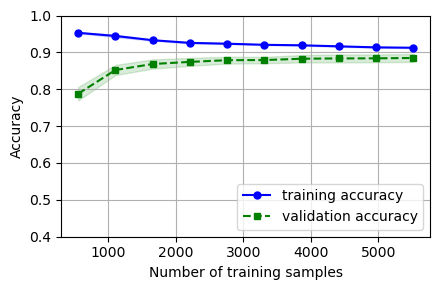

In [429]:
model_learning_curve(best_rf, X_train, y_train)

Residual Plots

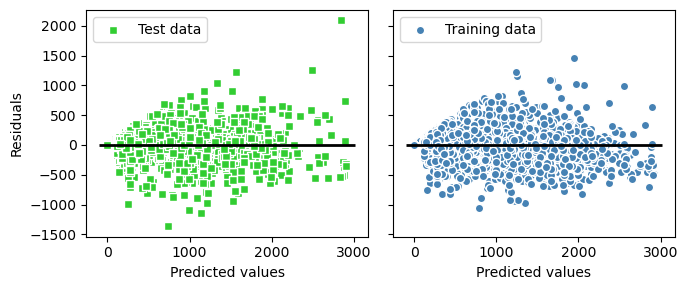

In [430]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])  
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)  

# Create a scatter plot for the test data
ax1.scatter(
    y_test_pred,                # Predicted values for the test set on the x-axis
    y_test_pred - y_test,      # Residuals (predicted - actual) on the y-axis
    c='limegreen',              # Color of the points
    marker='s',                 # Shape of the points (square)
    edgecolor='white',          # Color of the point edges
    label='Test data'           # Label for the legend
)

# Create a scatter plot for the training data
ax2.scatter(
    y_train_pred,              # Predicted values for the training set on the x-axis
    y_train_pred - y_train,    # Residuals (predicted - actual) on the y-axis
    c='steelblue',              # Color of the points
    marker='o',                 # Shape of the points (circle)
    edgecolor='white',          # Color of the point edges
    label='Training data'       # Label for the legend
)

ax1.set_ylabel('Residuals')   


for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values') 
    ax.legend(loc='upper left')        
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)  

plt.tight_layout()  
plt.show()